In [15]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import house_sales_data as hsd
from sklearn.model_selection import train_test_split

In [6]:
## Sacramento house price data; load
data = hsd.house_sales_data()
price = data["price"]
beds = data["beds"]
area = data["area"]
print(data.keys())

## Get the target (i.e., price) and two features
# price = ...
# area = ...
# beds = ...

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [24]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, iters, alpha=1.0):
    m, n = X.shape
    theta = np.zeros(n)
    errs = np.zeros(iters)

    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, errs
X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
ranges = normalize_data(X, y, [True, True, False])

In [26]:
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y


In [42]:
# Implement an evaluation metric for regression

def A(X, theta):
    return X@theta
def E(theta,X,y):
    return np.mean(np.square(A(X,theta)-y))

In [44]:
theta,cost=gradient_descent(X, y, 500, 0.1)

In [45]:
E(theta,X,y)

0.014339235247886856

In [40]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# call gradient descent and fine-tune your learning rate
gradient_descent(X, y, 500, 0.1)

(array([0.64617435, 0.07955829, 0.05428574]),
 array([0.10325909, 0.06845834, 0.04921421, 0.03854616, 0.03260631,
        0.02927359, 0.0273788 , 0.02627744, 0.02561422, 0.02519329,
        0.02490668, 0.02469486, 0.02452501, 0.02437902, 0.0242469 ,
        0.02412314, 0.02400468, 0.02388984, 0.02377766, 0.02366762,
        0.02355942, 0.02345287, 0.02334789, 0.02324438, 0.02314232,
        0.02304166, 0.02294238, 0.02284445, 0.02274785, 0.02265256,
        0.02255855, 0.02246582, 0.02237434, 0.0222841 , 0.02219506,
        0.02210723, 0.02202058, 0.02193508, 0.02185074, 0.02176752,
        0.02168542, 0.02160441, 0.02152448, 0.02144562, 0.02136781,
        0.02129103, 0.02121527, 0.02114051, 0.02106674, 0.02099395,
        0.02092212, 0.02085124, 0.02078128, 0.02071225, 0.02064413,
        0.0205769 , 0.02051055, 0.02044506, 0.02038044, 0.02031665,
        0.0202537 , 0.02019156, 0.02013023, 0.02006969, 0.02000994,
        0.01995096, 0.01989275, 0.01983528, 0.01977855, 0.01972255,
  

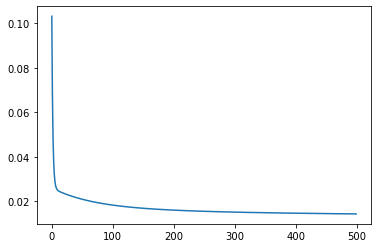

In [41]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
plt.plot(cost)

In [ ]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

In [50]:
l=[]
for i in np.arange(500,2001,100):
    theta,cost=gradient_descent(X, y, i, 0.1)
    l1=E(theta,X,y)
    l.append(l1)

    
    

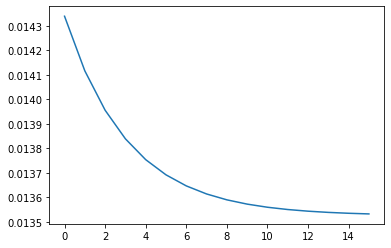

In [52]:
plt.plot(l)

In [62]:
# compare your solution with scikit-learn library
X = np.array([area, beds]).T
y = price
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


In [68]:
# Create linear regression object
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
regressor.predict(X_test)

array([0.33279794, 0.19847744, 0.46143228, 0.28216527, 0.26391927,
       0.13461642, 0.47808176, 0.16222921, 0.56476599, 0.18912636,
       0.25253123, 0.13416027, 0.21603922, 0.36291956, 0.2372502 ,
       0.24318015, 0.21079349, 0.35216861, 0.19461587, 0.25890162,
       0.14784477, 0.40420115, 0.28674249, 0.40006437, 0.23040795,
       0.20851274, 0.43701253, 0.24477667, 0.27305798, 0.25411204,
       0.19368786, 0.26141044, 0.14693247, 0.32619947, 0.17840683,
       0.31820113, 0.25618043, 0.38297445, 0.17110843, 0.24590134,
       0.15444324, 0.41034346, 0.25435583, 0.13736903, 0.47899406,
       0.29837432, 0.3360067 , 0.33576291, 0.26142615, 0.19187897,
       0.20668814, 0.18935443, 0.28423366, 0.35014736, 0.30546035,
       0.42240002, 0.43132637, 0.15537125, 0.13966549, 0.26165423,
       0.15651162, 0.23840628, 0.26802462, 0.17658223, 0.47262367,
       0.1503536 , 0.16268536, 0.18000336, 0.51160879, 0.41446452,
       0.14626396, 0.38732359, 0.32072567, 0.24296779, 0.33188

In [71]:
print(regressor.coef_)

[ 0.85847455 -0.12666022  0.        ]


In [73]:
E(regressor.coef_,X_test,y_test)

0.019401272082740128

In [ ]:
# Train the model using the training sets

In [ ]:
# Predict on test set and print evaluation metric
# How much does it differ by from 